# Project Tinder

Goal : To understand **what makes people interested into each other** (enough to go on a secound date).

What do we have : A **dataset** which gather informations from a speed dating experiment

How to proceed : exploratory data analysis (**EDA**)

## EDA & Dataviz

Exploratory Data Analysis :
Analysis approach that identifies general patterns in the data
Find interesting relationships between variables

Identify missing data and outliers

type of variable 
The target

Data Visualization :
Representation of data through use of common graphics. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import missingno as msno

In [3]:
print(pio.renderers.default)

vscode


### Importing Tinder's data

In [4]:
df = pd.read_csv("resources/Speed+Dating+Data.csv", encoding="cp1252")

display(df.describe())
print()
print("Number of rows : ", format(df.shape[0]))
print("Number of columns : ", format(df.shape[1]))

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000



Number of rows :  8378
Number of columns :  195


The number of column is huge, we cannot keep 195 columns to perform a first analysis properly

<Axes: >

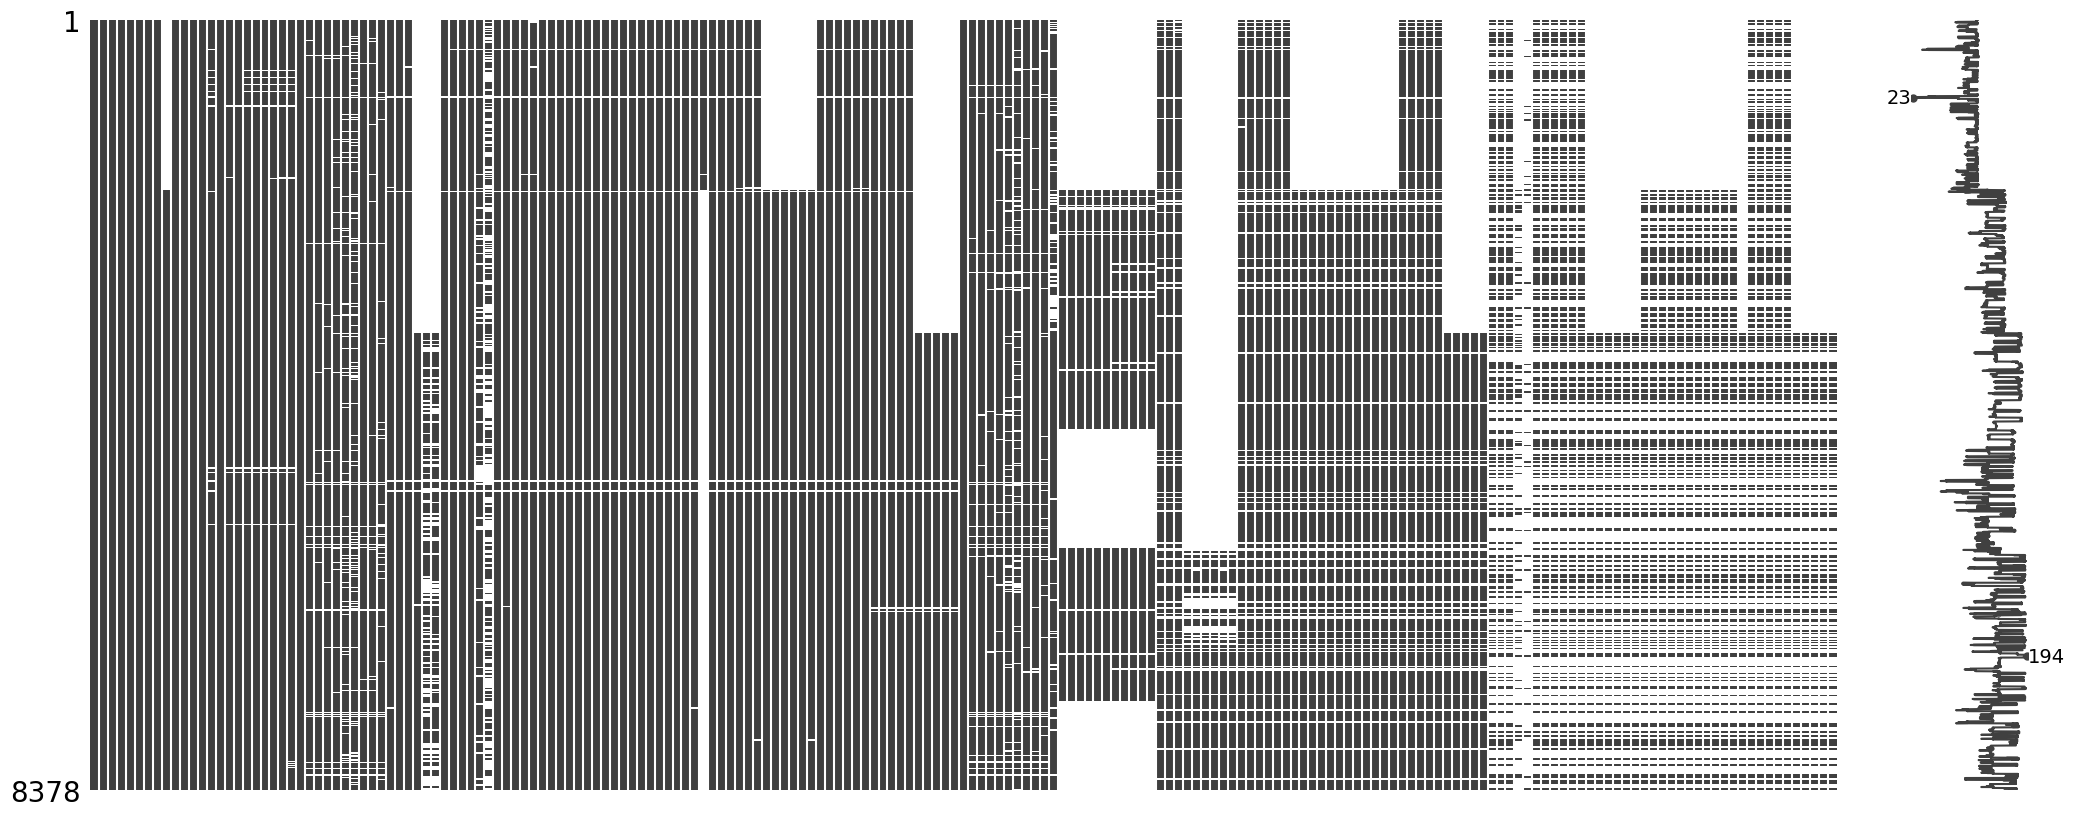

In [5]:
msno.matrix(df)

The visualization above helps to see missing values in the dataset at a first glance

## Functions

- Checking missing value

### Checking missing value

Purpose : Checking missing value from a given dataset

Name : missing_value

Input : dataframe\
Output : dataframe of 3 columns (column's name, number of missing value, percent of missing value)

In [61]:
col = ["pf_o_att","attr1_1","attr2_1","attr4_1","attr_o","dec_o","dec","attr7_2","attr1_2"]
dataframe = df[col]

def missing_value(dataframe):
  miss_value = dataframe.isna().sum()
  percent_list = []

  for _, value in miss_value.items():
    calcul_percent = round(value*100/dataframe.shape[0],1)
    percent_list.append(calcul_percent)

  miss_value = miss_value.reset_index()
  miss_value.columns = ["attributes","nb_missing_value"]
  miss_value["percent_missing_value"] = percent_list
  miss_value = miss_value.sort_values(by=["nb_missing_value"], ascending=False)
  #display(miss_value)
  return miss_value

missing_value(dataframe)
pass

### Selecting columns with the desired percentage of missing values

Purpose : To select columns according to a given percent of missing value.

Name : list_col_missing_values

Input : dataframe, percent of missing value wanted\
Output (return) : list of selected columns\
Output (print) : selected columns with their number of missing values


In [9]:
def list_col_missing_values(dataframe,percent_missing_values):
  col_list = []
  counter = 0
  nb_missing_values = percent_missing_values/100*dataframe.shape[0]
  for colname, value in dataframe.isna().sum().items():
    if value < nb_missing_values:
      counter += 1
      col_list.append(colname)
      print(f"{colname}: {value}")
  print()
  print(f"Number of columns with less than {percent_missing_values}% of missing values: {counter}")
  return col_list

list_col_missing_values(df,2)
pass


iid: 0
id: 1
gender: 0
idg: 0
condtn: 0
wave: 0
round: 0
position: 0
order: 0
partner: 0
pid: 10
match: 0
int_corr: 158
samerace: 0
age_o: 104
race_o: 73
pf_o_att: 89
pf_o_sin: 89
pf_o_int: 89
pf_o_fun: 98
pf_o_amb: 107
pf_o_sha: 129
dec_o: 0
age: 95
field: 63
field_cd: 82
race: 63
imprace: 79
imprelig: 79
from: 79
goal: 79
date: 97
go_out: 79
career: 89
career_c: 138
sports: 79
tvsports: 79
exercise: 79
dining: 79
museums: 79
art: 79
hiking: 79
gaming: 79
clubbing: 79
reading: 79
tv: 79
theater: 79
movies: 79
concerts: 79
music: 79
shopping: 79
yoga: 79
exphappy: 101
attr1_1: 79
sinc1_1: 79
intel1_1: 79
fun1_1: 89
amb1_1: 99
shar1_1: 121
attr2_1: 79
sinc2_1: 79
intel2_1: 79
fun2_1: 79
amb2_1: 89
shar2_1: 89
attr3_1: 105
sinc3_1: 105
fun3_1: 105
intel3_1: 105
amb3_1: 105
dec: 0

Number of columns with less than 2% of missing values: 71


## Analyse

In order to work with a consistant dataset, the first thing we have to be sure is that the number of participants and the number of partner are equal. Let's verify column `iid` and `pid`

In [10]:
print(df.shape)
print(df[["iid","pid"]].isna().sum())
print()

df_clean = df.loc[df["pid"].notna()]
print(df_clean.shape)
print(df_clean[["iid","pid"]].isna().sum())

(8378, 195)
iid     0
pid    10
dtype: int64

(8368, 195)
iid    0
pid    0
dtype: int64


### What are the least desirable attribute in a male partner ? Does this differ for female partners ?

Relevant columns :
- gender
- wave (there is different type of notation depending of the wave)
- attr1_1
- sinc1_1
- intel1_1
- fun1_1
- amb1_1
- shar1_1

In [ ]:
# Selecting relevant columns and dropping rows with missing values
list_columns = ["gender", "wave", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
df_col = df.loc[:,list_columns]
df_clean = df_col.dropna()

# Checking the impact of the cleaning
rows_removed_nb = df_col.shape[0]-df_clean.shape[0]
#print(f"{rows_removed_nb} rows removed, wich is {round(rows_removed_nb*100/df_col.shape[0],1)}% of the dataset")
print("{} rows removed, meaning {}% of the dataset".format(rows_removed_nb, round(rows_removed_nb*100/df_col.shape[0],1)))

121 rows removed, meaning 1.4% of the dataset


In [14]:

df_clean_female = df_clean.loc[df_clean["gender"]==0,:].mean()\
                                .sort_values(ascending=False)\
                                .drop(["gender","wave"])\
                                .reset_index()
df_clean_female.columns = ['Attributes', 'Mean']

df_clean_male = df_clean.loc[df_clean["gender"]==1,:].mean().sort_values(ascending=False).drop(["gender","wave"]).reset_index()
df_clean_male.columns = ['Attributes', 'Mean']

print("Female:")
display(df_clean_female)
print("Male:")
display(df_clean_male)

fig_histo_female = px.histogram(df_clean_female, x="Attributes", y="Mean", title="What female look for in male")
fig_histo_female.show()
fig_histo_male = px.histogram(df_clean_male, x="Attributes", y="Mean",title="What male look for in female")
fig_histo_male.show()


Female:


,Attributes,Mean
0,intel1_1,20.954258
1,sinc1_1,18.349539
2,attr1_1,17.937558
3,fun1_1,17.185615
4,amb1_1,12.842381
5,shar1_1,12.704194


Male:


,Attributes,Mean
0,attr1_1,26.762429
1,intel1_1,19.559220
2,fun1_1,17.758510
3,sinc1_1,16.505650
4,shar1_1,10.996574
5,amb1_1,8.552829


In [ ]:
df_clean_mean = df_clean.groupby("gender").mean().reset_index()
df_clean_mean = df_clean_mean.drop(["gender", "wave"], axis=1)
#print(df_clean_mean)
#print()
df_clean_mean_T = df_clean_mean.T.reset_index()
df_clean_mean_T.columns = ['Attributes', 'Female','Male']
print(df_clean_mean_T)

histo = px.histogram(df_clean_mean_T, x="Attributes", y=["Female","Male"], barmode='group', title="What subjects look for in the opposite sex : ")
histo.show()

  Attributes     Female       Male
0    attr1_1  17.937558  26.762429
1    sinc1_1  18.349539  16.505650
2   intel1_1  20.954258  19.559220
3     fun1_1  17.185615  17.758510
4     amb1_1  12.842381   8.552829
5    shar1_1  12.704194  10.996574


#### Verifying the impact of the difference of rating depending of waves

In [23]:
# Selecting waves

# Selecting waves 6-9
df_waves_6to9 = df_clean[df_clean["wave"].isin(range(6,10))]
print(f'Number of rows waves 6-9 : {df_waves_6to9.shape[0]}')

# Selecting waves 1-5, 10-21
df_waves_1to5_10to21 = df_clean[df_clean["wave"].isin([1,2,3,4,5,10,11,12,13,14,15,16,17,18,19,20,21])]
print(f'Number of rows waves 6-9 : {df_waves_1to5_10to21.shape[0]}')

print(f"Sum of rows of df_waves_6to9 and df_waves_1to5_10to21 : {df_waves_6to9.shape[0]+df_waves_1to5_10to21.shape[0]}")
print(f"Total rows of df_clean : {df_clean.shape[0]}")



Number of rows waves 6-9 : 1557
Number of rows waves 6-9 : 6700
Sum of rows of df_waves_6to9 and df_waves_1to5_10to21 : 8257
Total rows of df_clean : 8257


##### Waves 6-9

In [18]:
df_waves_6to9_female = df_waves_6to9.loc[df_waves_6to9["gender"]==0,:]\
                .drop(["gender", "wave"], axis=1)\
                .mean()\
                .sort_values(ascending=False)\
                .reset_index()

df_waves_6to9_male = df_waves_6to9.loc[df_waves_6to9["gender"]==1,:]\
                .drop(["gender", "wave"], axis=1)\
                .mean()\
                .sort_values(ascending=False)\
                .reset_index()

df_waves_6to9_female.columns = ['Attributes', 'Mean']
display(df_waves_6to9_female)
df_waves_6to9_male.columns = ['Attributes', 'Mean']
display(df_waves_6to9_male)

fig_waves_6to9_female = px.histogram(df_waves_6to9_female, x="Attributes", y="Mean", height=400, title="Attributes looked for by female - waves 6to9")
fig_waves_6to9_female.show()
fig_waves_6to9_male = px.histogram(df_waves_6to9_male, x="Attributes", y="Mean", height=400, title="Attributes looked for by male - waves 6to9")
fig_waves_6to9_male.show()

,Attributes,Mean
0,intel1_1,18.559987
1,sinc1_1,17.993930
2,fun1_1,17.594987
3,amb1_1,16.372964
4,attr1_1,14.888956
5,shar1_1,14.590644


,Attributes,Mean
0,intel1_1,19.419027
1,fun1_1,18.223649
2,sinc1_1,17.651050
3,attr1_1,17.419526
4,shar1_1,14.183726
5,amb1_1,13.105109


In [19]:
df_waves_6to9_mean = df_waves_6to9.groupby("gender").mean().reset_index().drop(["gender","wave"], axis=1)
display(df_waves_6to9_mean)

df_waves_6to9_mean_T = df_waves_6to9_mean.T.reset_index()
df_waves_6to9_mean_T.columns = ['Attributes', 'Female','Male']
display(df_waves_6to9_mean_T)

histo_waves_6to9 = px.histogram(df_waves_6to9_mean_T, x="Attributes", y=["Female","Male"], barmode='group', title="Attributes looked for in the opposite sex - waves 6to9")
histo_waves_6to9.show()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,14.888956,17.99393,18.559987,17.594987,16.372964,14.590644
1,17.419526,17.65105,19.419027,18.223649,13.105109,14.183726


,Attributes,Female,Male
0,attr1_1,14.888956,17.419526
1,sinc1_1,17.993930,17.651050
2,intel1_1,18.559987,19.419027
3,fun1_1,17.594987,18.223649
4,amb1_1,16.372964,13.105109
5,shar1_1,14.590644,14.183726


##### Waves 1-5 and 10-21

In [20]:
df_waves_1to5_10to21_female = df_waves_1to5_10to21.loc[df_waves_1to5_10to21["gender"]==0,:]\
                .drop(["gender", "wave"], axis=1)\
                .mean()\
                .sort_values(ascending=False)\
                .reset_index()

df_waves_1to5_10to21_male = df_waves_1to5_10to21.loc[df_waves_1to5_10to21["gender"]==1,:]\
                .drop(["gender", "wave"], axis=1)\
                .mean()\
                .sort_values(ascending=False)\
                .reset_index()

df_waves_1to5_10to21_female.columns = ['Attributes', 'Mean']
display(df_waves_1to5_10to21_female)
df_waves_1to5_10to21_male.columns = ['Attributes', 'Mean']
display(df_waves_1to5_10to21_male)

fig_df_waves_1to5_10to21_female = px.histogram(df_waves_1to5_10to21_female, x="Attributes", y="Mean", height=400, title="Attributes looked for by female - waves 1to5 & 10to21")
fig_df_waves_1to5_10to21_female.show()
fig_df_waves_1to5_10to21_male = px.histogram(df_waves_1to5_10to21_male, x="Attributes", y="Mean", height=400, title="Attributes looked for by male - waves waves 1to5 & 10to21")
fig_df_waves_1to5_10to21_male.show()

,Attributes,Mean
0,intel1_1,21.512705
1,attr1_1,18.648623
2,sinc1_1,18.432483
3,fun1_1,17.090132
4,shar1_1,12.264193
5,amb1_1,12.018897


,Attributes,Mean
0,attr1_1,28.925728
1,intel1_1,19.591681
2,fun1_1,17.650809
3,sinc1_1,16.240439
4,shar1_1,10.258607
5,amb1_1,7.498773


In [24]:
df_waves_1to5_10to21_mean = df_waves_1to5_10to21.groupby("gender").mean().reset_index().drop(["gender","wave"], axis=1)
display(df_waves_1to5_10to21_mean)

df_waves_1to5_10to21_mean_T = df_waves_1to5_10to21_mean.T.reset_index()
df_waves_1to5_10to21_mean_T.columns = ['Attributes', 'Female','Male']
display(df_waves_1to5_10to21_mean_T)

histo_waves_1to5_10to21 = px.histogram(df_waves_1to5_10to21_mean_T, x="Attributes", y=["Female","Male"], barmode='group', title="Attributes looked for in the opposite sex - waves 1to5 & 10to21")
histo_waves_1to5_10to21.show()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,18.648623,18.432483,21.512705,17.090132,12.018897,12.264193
1,28.925728,16.240439,19.591681,17.650809,7.498773,10.258607


,Attributes,Female,Male
0,attr1_1,18.648623,28.925728
1,sinc1_1,18.432483,16.240439
2,intel1_1,21.512705,19.591681
3,fun1_1,17.090132,17.650809
4,amb1_1,12.018897,7.498773
5,shar1_1,12.264193,10.258607


###  How important do people think attractiveness is in potential mate selection vs. its real impact?

#### Description of usefull columns

Filled before participating :

- `attr2_1`, `sinc2_1`, `intel2_1`, `fun2_1`, `amb2_1`, `shar2_1` : what members think the opposite sex looks for in a date
- `attr4_1`, `sinc4_1`, `intel4_1`, `fun4_1`, `amb4_1`, `shar4_1` : what members think most of their fellow look for in the opposite sex
- `pf_o_att`, `pf_o_sin`, `pf_o_int`, `pf_o_fun`, `pf_o_amb`, `pf_o_sha` : partner's stated preference at time 1 -> equivalent of attributes `attr1_1`, `sinc1_1`, `intel1_1`, `fun1_1`, `amb1_1`, `shar1_1` : what members look for in the opposite sex
- `attr_o`, `sinc_o`, `intel_o`, `fun_o`, `amb_o`, `shar_o` : partner's rating the night of the event (what the partner think of the member) -> equivalent of attributes `attr`, `sinc`, `intel`, `fun`, `amb`, `shar` : members rating the partner the night of the event (what the member think of his partner)
- `dec_o` : decision of partner (the night of the event). 1 = yes, 0 = no
- `dec` : decision of member the night oh the event. 1 = yes, 0 = no\
Note : `dec` and `dec_o` should have the same repartition

Filled days after participating :

- `attr7_2`, `sinc7_2`, `intel7_2`, `fun7_2`, `amb7_2`, `shar7_2` : rating attributes in the way that reflects the importance of these in the decision
- `attr1_2`, `sinc1_2`, `intel1_2`, `fun1_2`, `amb1_2`, `shar1_2` : what menbers think the opposite sex looks for in a date

In [28]:
col = ["pf_o_att","attr1_1","attr2_1","attr4_1","attr_o","dec_o","dec","attr7_2","attr1_2"]

In [29]:
dataframe = df[col]
missing_value(dataframe)

,attributes,nb_missing_value,percent_missing_value
7,attr7_2,6394,76.3
3,attr4_1,1889,22.5
8,attr1_2,933,11.1
4,attr_o,212,2.5
0,pf_o_att,89,1.1
1,attr1_1,79,0.9
2,attr2_1,79,0.9
5,dec_o,0,0.0
6,dec,0,0.0


,attributes,nb_missing_value,percent_missing_value
7,attr7_2,6394,76.3
3,attr4_1,1889,22.5
8,attr1_2,933,11.1
4,attr_o,212,2.5
0,pf_o_att,89,1.1
1,attr1_1,79,0.9
2,attr2_1,79,0.9
5,dec_o,0,0.0
6,dec,0,0.0


Columns `attr7_2`, `attr4_1`, `attr1_2`  have a lot of missing value. For now we let them appart, they are not necessary for our analyse.\
We keep the others and clean them from missing value

In [30]:
col =["pf_o_att","attr1_1","attr2_1","attr_o","dec_o","dec"]

In [31]:
def cleaning_missing_value(dataframe):
  df_clean = dataframe.dropna()
  rows_removed = dataframe.shape[0]-df_clean.shape[0]
  print("Number of rows dropped: ",rows_removed)
  return df_clean

cleaning_missing_value(df[col])

Number of rows dropped:  355


,pf_o_att,attr1_1,attr2_1,attr_o,dec_o,dec
0,35.0,15.0,35.0,6.0,0,1
1,60.0,15.0,35.0,7.0,0,1
2,19.0,15.0,35.0,10.0,1,1
3,30.0,15.0,35.0,7.0,1,1
4,30.0,15.0,35.0,8.0,1,1
...,...,...,...,...,...,...
8373,10.0,70.0,50.0,10.0,1,0
8374,50.0,70.0,50.0,6.0,0,0
8375,40.0,70.0,50.0,2.0,0,0
8376,10.0,70.0,50.0,5.0,1,0


It will be interesting to compare what people think the opposite sex look for vs what people look for.
`attr2_1` vs `pf_o_att`

In [32]:
col = ["gender", "attr2_1", "pf_o_att"]
df_attr2_1_vs_pf_o_att = cleaning_missing_value(df[col])
df_attr2_1_vs_pf_o_att.columns = ["gender","att_members_think_about_partner","att_partner_pref"]
display(df_attr2_1_vs_pf_o_att)
df_attr2_1_vs_pf_o_att = df_attr2_1_vs_pf_o_att.drop(["gender"],axis=1).mean().reset_index()
df_attr2_1_vs_pf_o_att.columns = ["Attributes","Mean"]
display(df_attr2_1_vs_pf_o_att)

px.histogram(df_attr2_1_vs_pf_o_att, x="Attributes", y=["Mean"])


Number of rows dropped:  168


,gender,att_members_think_about_partner,att_partner_pref
0,0,35.0,35.0
1,0,35.0,60.0
2,0,35.0,19.0
3,0,35.0,30.0
4,0,35.0,30.0
...,...,...,...
8373,1,50.0,10.0
8374,1,50.0,50.0
8375,1,50.0,40.0
8376,1,50.0,10.0


,Attributes,Mean
0,att_members_think_about_partner,30.368130
1,att_partner_pref,22.469339


In [33]:
col = ["gender", "attr2_1", "pf_o_att"]
df_attr2_1_vs_pf_o_att = cleaning_missing_value(df[col])
df_attr2_1_vs_pf_o_att = df_attr2_1_vs_pf_o_att.groupby("gender").mean().reset_index().drop(["gender"], axis=1)
display(df_attr2_1_vs_pf_o_att)
df_attr2_1_vs_pf_o_att.columns = ["att_members_think_about_partner","att_partner_pref"]
display(df_attr2_1_vs_pf_o_att)
df_attr2_1_vs_pf_o_att_T = df_attr2_1_vs_pf_o_att.T.reset_index()
df_attr2_1_vs_pf_o_att_T.columns = ["Attributes","Female","Male"]
display(df_attr2_1_vs_pf_o_att_T)

px.histogram(df_attr2_1_vs_pf_o_att_T, x="Attributes", y=["Female","Male"], barmode="group")

Number of rows dropped:  168


,attr2_1,pf_o_att
0,35.695296,26.872952
1,25.040965,18.065725


,att_members_think_about_partner,att_partner_pref
0,35.695296,26.872952
1,25.040965,18.065725


,Attributes,Female,Male
0,att_members_think_about_partner,35.695296,25.040965
1,att_partner_pref,26.872952,18.065725


We will investigate on the tost important attributes ragarding to the decision of seeing the partner or not.

Helpfull columns : `dec`, `attr`, `sinc`, `intel`, `fun`, `amb`, `shar`

In [39]:
df["attr"]

0       6.0
1       7.0
2       5.0
3       7.0
4       5.0
       ... 
8373    3.0
8374    4.0
8375    4.0
8376    4.0
8377    3.0
Name: attr, Length: 8378, dtype: float64

In [37]:
col_xxxx = ["attr","sinc","intel","fun","amb","shar"]
col_xxxx.insert(0,"dec")
col_xxxx


['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

In [38]:
df_most_imp_attribute = cleaning_missing_value(df[col_xxxx])
#display(df_most_imp_attribute)
df_most_imp_attribute = df_most_imp_attribute.groupby("dec").mean().reset_index().drop("dec", axis=1)
#display(df_most_imp_attribute)
df_most_imp_attribute_T = df_most_imp_attribute.T.reset_index()
df_most_imp_attribute_T.columns = ["Attributes","No","Yes"]
display(df_most_imp_attribute_T)
px.histogram(df_most_imp_attribute_T, x="Attributes", y=["No","Yes"], barmode="group")

Number of rows dropped:  1338


,Attributes,No,Yes
0,attr,5.367757,7.283235
1,sinc,6.848901,7.580040
2,intel,7.065684,7.741436
3,fun,5.695929,7.325593
4,amb,6.470529,7.141469
5,shar,4.713287,6.452404


#### Out of curiosity, what are the correlation between attributes and results (seeing partner: yes or not)

In [36]:
df_attributes_male = df.loc[df["gender"]==1,col_xxxx]
df_attributes_female = df.loc[df["gender"]==0,col_xxxx]

# Calculating the correlation for female
df_corr_female = df_attributes_female.corrwith(df_attributes_female["dec"]).sort_values(ascending=False).drop("dec").reset_index()
display(df_corr_female)
fig_corr_female = px.histogram(df_corr_female, x="index", y=0, title="Correlation between attributes and decision - Female")
fig_corr_female.show()

# Calculating the correlation for male
df_corr_male = df_attributes_male.corrwith(df_attributes_male["dec"]).sort_values(ascending=False).drop("dec").reset_index()
display(df_corr_male)
fig_corr_male = px.histogram(df_corr_male, x="index", y=0, title="Correlation between attributes and decision - Male")
fig_corr_male.show()


,index,0
0,attr,0.444979
1,fun,0.416553
2,shar,0.413190
3,intel,0.232939
4,sinc,0.222265
5,amb,0.175386


,index,0
0,attr,0.515497
1,fun,0.407360
2,shar,0.387368
3,amb,0.219542
4,intel,0.216818
5,sinc,0.190859


#### Let's focus on the most successfull members

In [40]:
df_success_mean = df.groupby("iid")[["dec_o","gender","attr_o","sinc_o","intel_o","fun_o","amb_o","shar_o"]].mean().reset_index()
#display(df_success_mean)
df_success_members = df_success_mean.loc[df_success_mean["dec_o"]>0.8]
#display(df_success_members)
#print("Number of positive decision for female: ",(df_success_members["gender"]==0).sum())
#print("Number of positive decision for male: ",(df_success_members["gender"]==1).sum())

df_success_members = df_success_members.groupby("gender").mean().drop(["iid","dec_o"],axis=1).reset_index()
#display(df_success_members)

df_success_members_T = df_success_members.drop("gender",axis=1).T.reset_index()
display(df_success_members_T)
fig_success = px.histogram(df_success_members_T, x="index", y=[0,1], barmode="group")
fig_success.show()

,index,0,1
0,attr_o,7.683532,7.362491
1,sinc_o,7.534213,7.657374
2,intel_o,7.440519,7.973118
3,fun_o,7.382705,7.545514
4,amb_o,7.062767,7.653179
5,shar_o,6.147625,7.030134


In [41]:
df_success_mean = df.groupby("iid")[["dec_o","gender","attr_o","sinc_o","intel_o","fun_o","amb_o","shar_o"]].mean().reset_index()
#display(df_success_mean)
df_success_members = df_success_mean.loc[df_success_mean["dec_o"]<0.2]
#display(df_success_members)
#print("Number of positive decision for female: ",(df_success_members["gender"]==0).sum())
#print("Number of positive decision for male: ",(df_success_members["gender"]==1).sum())

df_success_members = df_success_members.groupby("gender").mean().drop(["iid","dec_o"],axis=1).reset_index()
#display(df_success_members)

df_success_members_T = df_success_members.drop("gender",axis=1).T.reset_index()
display(df_success_members_T)
fig_success = px.histogram(df_success_members_T, x="index", y=[0,1], barmode="group")
fig_success.show()

,index,0,1
0,attr_o,5.004209,4.564274
1,sinc_o,7.116118,6.925557
2,intel_o,6.923452,7.286669
3,fun_o,5.646401,5.171699
4,amb_o,6.072238,6.782745
5,shar_o,4.690956,4.436619


We can see that attraction is an important part of the decision

### Are shared interests more important than a shared racial background?

Usefull columns :
- `samerace`: participant and partner were the same race (1=yes, 0=no)
- `int_corr`: correlation between participant's and partner's ratings of interests in Time 1
- `dec`: decision of the participant (1=yes, 0=no)

In [87]:
#df_samerace = df.loc[:,["gender","samerace","dec"]]
#print(df_samerace.isna().sum())

#df_int_corr = df.loc[:,["gender","int_corr","dec"]]
#print(df_int_corr.isna().sum())

df_interests_samerace = df.loc[:,["gender","samerace","int_corr","dec"]]
df_interests_samerace


,gender,samerace,int_corr,dec
0,0,0,0.14,1
1,0,0,0.54,1
2,0,1,0.16,1
3,0,0,0.61,1
4,0,0,0.21,1
...,...,...,...,...
8373,1,0,0.64,0
8374,1,0,0.71,0
8375,1,0,-0.46,0
8376,1,0,0.62,0


In [88]:
# Cleaning the dataset from missing values
missing_value(df_interests_samerace)
display(missing_value(df_interests_samerace))
display(df_interests_samerace.shape)
df_interests_samerace_clean = df_interests_samerace.dropna()
display(missing_value(df_interests_samerace_clean))
display(df_interests_samerace_clean.shape)

,attributes,nb_missing_value,percent_missing_value
2,int_corr,158,1.9
0,gender,0,0.0
1,samerace,0,0.0
3,dec,0,0.0


(8378, 4)

,attributes,nb_missing_value,percent_missing_value
0,gender,0,0.0
1,samerace,0,0.0
2,int_corr,0,0.0
3,dec,0,0.0


(8220, 4)

In [89]:
interests_samerace_corr = df_interests_samerace_clean.corrwith(df_interests_samerace_clean["dec"]).sort_values(ascending=False).drop(["dec","gender"]).reset_index()
display(interests_samerace_corr)
fig_interests_samerace_corr = px.histogram(interests_samerace_corr, x="index", y=0, title="Correlation between shared interests vs same race")
fig_interests_samerace_corr.show()

,index,0
0,samerace,0.024263
1,int_corr,0.018517


In [ ]:
df_samerace_dec = df_interests_samerace_clean.groupby('samerace')['dec'].mean().reset_index()
display(df_samerace_dec)
df_interests_dec = df_interests_samerace_clean.groupby('samerace')['dec'].mean().reset_index()
display(df_interests_dec)

,samerace,dec
0,0,0.410032
1,1,0.434466


In [92]:
samerace_dec_male = df_interests_samerace_clean.loc[df_interests_samerace_clean["gender"]==1].groupby('samerace')['dec'].mean().reset_index()
display(samerace_dec_male)
samerace_dec_female = df_interests_samerace_clean.loc[df_interests_samerace_clean["gender"]==0].groupby('samerace')['dec'].mean().reset_index()
display(samerace_dec_female)

,samerace,dec
0,0,0.473855
1,1,0.475121


,samerace,dec
0,0,0.345950
1,1,0.393811


=> Neither shared interests or shared racial background are significant in the decision to go for a 2nd date. A least samerace is a bit more significant for women than men but given the 

## Testing zone

In [52]:
col = ["attr","sinc","intel","fun","amb","shar"]
col.insert(0,"dec")
print(col)
df_most_imp_attribute = cleaning_missing_value(df[col])
display(df_most_imp_attribute)

['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
Number of rows dropped:  1338


,dec,attr,sinc,intel,fun,amb,shar
0,1,6.0,9.0,7.0,7.0,6.0,5.0
1,1,7.0,8.0,7.0,8.0,5.0,6.0
2,1,5.0,8.0,9.0,8.0,5.0,7.0
3,1,7.0,6.0,8.0,7.0,6.0,8.0
4,1,5.0,6.0,7.0,7.0,6.0,6.0
...,...,...,...,...,...,...,...
8367,0,2.0,7.0,6.0,6.0,6.0,7.0
8368,0,3.0,4.0,6.0,4.0,4.0,4.0
8369,0,3.0,3.0,9.0,6.0,9.0,6.0
8370,0,2.0,7.0,9.0,8.0,7.0,8.0


In [49]:
fig = px.scatter_matrix(df_most_imp_attribute, dimensions=["attr","sinc","intel","fun","amb","shar"], color="dec")
fig.show()

#### Out of curiosity, what are the correlation between attributes and results (seeing partner: yes or not)

In [56]:
col = ["attr","sinc","intel","fun","amb","shar","attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]
col.insert(0,"dec")
print(col)
df_col = cleaning_missing_value(df[col])
display(df_col)

['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
Number of rows dropped:  1446


,dec,attr,sinc,intel,fun,amb,shar,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,1,6.0,9.0,7.0,7.0,6.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0
1,1,7.0,8.0,7.0,8.0,5.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0
2,1,5.0,8.0,9.0,8.0,5.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0
3,1,7.0,6.0,8.0,7.0,6.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0
4,1,5.0,6.0,7.0,7.0,6.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,0,2.0,7.0,6.0,6.0,6.0,7.0,70.0,0.0,15.0,15.0,0.0,0.0
8368,0,3.0,4.0,6.0,4.0,4.0,4.0,70.0,0.0,15.0,15.0,0.0,0.0
8369,0,3.0,3.0,9.0,6.0,9.0,6.0,70.0,0.0,15.0,15.0,0.0,0.0
8370,0,2.0,7.0,9.0,8.0,7.0,8.0,70.0,0.0,15.0,15.0,0.0,0.0


In [57]:
df_attributes_male = df.loc[df["gender"]==1,col]
df_attributes_female = df.loc[df["gender"]==0,col]

# Calculating the correlation for female
df_corr_female = df_attributes_female.corrwith(df_attributes_female["dec"]).sort_values(ascending=False).drop("dec").reset_index()
display(df_corr_female)
fig_corr_female = px.histogram(df_corr_female, x="index", y=0, title="Correlation between attributes and decision - Female")
fig_corr_female.show()

# Calculating the correlation for male
df_corr_male = df_attributes_male.corrwith(df_attributes_male["dec"]).sort_values(ascending=False).drop("dec").reset_index()
display(df_corr_male)
fig_corr_male = px.histogram(df_corr_male, x="index", y=0, title="Correlation between attributes and decision - Male")
fig_corr_male.show()

,index,0
0,attr,0.444979
1,fun,0.416553
2,shar,0.413190
3,intel,0.232939
4,sinc,0.222265
5,amb,0.175386
6,shar1_1,0.059116
7,fun1_1,0.038769
8,sinc1_1,0.031118
9,amb1_1,0.000451


,index,0
0,attr,0.515497
1,fun,0.407360
2,shar,0.387368
3,amb,0.219542
4,intel,0.216818
5,sinc,0.190859
6,shar1_1,0.057287
7,sinc1_1,0.054205
8,amb1_1,0.032420
9,intel1_1,0.015434
